<a href="https://colab.research.google.com/github/Gabriela14012004/PROYECTO-IA/blob/main/04_Modelo_con_preprocesado_y_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar recursos

In [1]:
# Configuración inicial del entorno
# En este apartado se preparan los recursos necesarios, como la autenticación con Kaggle y la descarga del conjunto de datos.

# Archivo de configuración cargado desde el repositorio del curso
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [2]:
# Subir el archivo kaggle.json para realizar la autenticación
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gabrielatejadaarias","key":"da5e19e7ff517d7b1c7342a054a0c404"}'}

In [3]:
# Se configuran los permisos de kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia


  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.29GB/s]


In [4]:
!unzip udea*.zip > /dev/null

In [5]:
!wc *.csv # Ver cuántos datos hay en cada archivo

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


In [6]:
# Carga de datos
# aqui se carga el conjunto de entrenamiento y se realiza una primera exploración para poder entender su estructura.


import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


In [7]:

import matplotlib.pyplot as plt

In [8]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


# Preprocesado de datos
En base a la exploracion de los datos, nosotras decidimos trabajar con las siguientes columnas:

-PAGO MATRICULA PROPIO

-F_TIENECOMPUTADOR

-F_TIENEINTERNET.1

-F_EDUCACIONPADRE

-F_EDUCACIONMADRE

-F_ESTRATOVIVIENDA

-F_HORASSEMANATRABAJA

-E_PRGM_DEPARTAMENTO

-RENDIMIENTO_GLOBAL

In [9]:
# Preprocesamiento de datos
# en esta parte se seleccionan y agrupan las variables de interés y se manejan valores nulos.

datos = z[['E_PAGOMATRICULAPROPIO',
           'F_TIENECOMPUTADOR',
           'F_TIENEINTERNET.1',
           'F_EDUCACIONPADRE',
           'F_EDUCACIONMADRE',
           'F_ESTRATOVIVIENDA',
           'E_HORASSEMANATRABAJA',
           'E_PRGM_DEPARTAMENTO',
           'RENDIMIENTO_GLOBAL']]

datos.head()




,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONPADRE,F_EDUCACIONMADRE,F_ESTRATOVIVIENDA,E_HORASSEMANATRABAJA,E_PRGM_DEPARTAMENTO,RENDIMIENTO_GLOBAL
0,No,Si,Si,Técnica o tecnológica incompleta,Postgrado,Estrato 3,Menos de 10 horas,BOGOTÁ,medio-alto
1,No,Si,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,Estrato 3,0,ATLANTICO,bajo
2,No,No,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 3,Más de 30 horas,BOGOTÁ,bajo
3,No,Si,Si,No sabe,Secundaria (Bachillerato) completa,Estrato 4,0,SANTANDER,alto
4,No,Si,Si,Primaria completa,Primaria completa,Estrato 3,Entre 21 y 30 horas,ANTIOQUIA,medio-bajo


Limpieza de datos nulos

In [10]:
datos = datos.rename(columns={'F_TIENEINTERNET.1': 'F_TIENEINTERNET_1'})


In [11]:
# Revisar valores nulos en todas las variables categóricas y numéricas nuevas

sum(datos.E_PAGOMATRICULAPROPIO.isna()), \
sum(datos.F_TIENECOMPUTADOR.isna()), \
sum(datos.F_TIENEINTERNET_1.isna()), \
sum(datos.F_EDUCACIONPADRE.isna()), \
sum(datos.F_EDUCACIONMADRE.isna()), \
sum(datos.F_ESTRATOVIVIENDA.isna()), \
sum(datos.E_HORASSEMANATRABAJA.isna()), \
sum(datos.E_PRGM_DEPARTAMENTO.isna())



(6498, 38103, 26629, 23178, 23664, 32137, 30857, 0)

In [12]:
# Reemplazar valores nulos en variables categóricas
datos.E_PAGOMATRICULAPROPIO.values[datos.E_PAGOMATRICULAPROPIO.isna()] = 'no info'
datos.F_TIENECOMPUTADOR.values[datos.F_TIENECOMPUTADOR.isna()] = 'no info'
datos.F_TIENEINTERNET_1.values[datos.F_TIENEINTERNET_1.isna()] = 'no info'
datos.F_EDUCACIONPADRE.values[datos.F_EDUCACIONPADRE.isna()] = 'no info'
datos.F_EDUCACIONMADRE.values[datos.F_EDUCACIONMADRE.isna()] = 'no info'
datos.F_ESTRATOVIVIENDA.values[datos.F_ESTRATOVIVIENDA.isna()] = 'no info'

# Asumimos que si no reporta horas trabajadas, el estudiante NO trabaja
datos.E_HORASSEMANATRABAJA.values[datos.E_HORASSEMANATRABAJA.isna()] = 0



# Verificar nulos nuevamente
sum(datos.E_PAGOMATRICULAPROPIO.isna()), \
sum(datos.F_TIENECOMPUTADOR.isna()), \
sum(datos.F_TIENEINTERNET_1.isna()), \
sum(datos.F_EDUCACIONPADRE.isna()), \
sum(datos.F_EDUCACIONMADRE.isna()), \
sum(datos.F_ESTRATOVIVIENDA.isna()), \
sum(datos.E_HORASSEMANATRABAJA.isna()), \
sum(datos.E_PRGM_DEPARTAMENTO.isna())



(0, 0, 0, 0, 0, 0, 0, 0)

Limpieza de pago matricula Propio

In [13]:
y = datos.E_PAGOMATRICULAPROPIO.values
E_PAGOMATRICULAPROPIO_vals = sorted(np.unique(y))
E_PAGOMATRICULAPROPIO_onehot_vals = {val: np.eye(len(E_PAGOMATRICULAPROPIO_vals))[i] for i,val in enumerate(E_PAGOMATRICULAPROPIO_vals)} # Crear diccionario de codificación one-hot
E_PAGOMATRICULAPROPIO_onehot_vals # Ver la codificación asignada a cada categoría

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [14]:
E_PAGOMATRICULAPROPIO_onehot_enc = np.r_[[E_PAGOMATRICULAPROPIO_onehot_vals[i] for i in datos.E_PAGOMATRICULAPROPIO]] # Aplicar la codificación a cada registro
E_PAGOMATRICULAPROPIO_onehot_enc

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [15]:
E_PAGOMATRICULAPROPIO_df = pd.DataFrame(E_PAGOMATRICULAPROPIO_onehot_enc, columns=[f"E_PAGOMATRICULAPROPIO__{v}" for v in E_PAGOMATRICULAPROPIO_onehot_vals]) # Se crea un nuevo DataFrame a partir del resultado codificado
E_PAGOMATRICULAPROPIO_df # Mostrar las primeras filas del nuevo DataFrame

,E_PAGOMATRICULAPROPIO__No,E_PAGOMATRICULAPROPIO__Si,E_PAGOMATRICULAPROPIO__no info
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
692495,0.0,1.0,0.0
692496,1.0,0.0,0.0
692497,0.0,1.0,0.0
692498,0.0,1.0,0.0


Limpieza de familia tiene computador

In [16]:
y = datos.F_TIENECOMPUTADOR.values
F_TIENECOMPUTADOR_vals = sorted(np.unique(y))

F_TIENECOMPUTADOR_onehot_vals = {
    val: np.eye(len(F_TIENECOMPUTADOR_vals))[i]
    for i, val in enumerate(F_TIENECOMPUTADOR_vals)
}

F_TIENECOMPUTADOR_onehot_vals   # Ver la codificación asignada a cada categoría


{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [17]:
F_TIENECOMPUTADOR_onehot_enc = np.r_[
    [F_TIENECOMPUTADOR_onehot_vals[i] for i in datos.F_TIENECOMPUTADOR]
]  # Aplicar la codificación a cada registro

F_TIENECOMPUTADOR_onehot_enc


array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [18]:
F_TIENECOMPUTADOR_df = pd.DataFrame(
    F_TIENECOMPUTADOR_onehot_enc,
    columns=[f"F_TIENECOMPUTADOR__{v}" for v in F_TIENECOMPUTADOR_onehot_vals]
)

F_TIENECOMPUTADOR_df   # Mostrar las primeras filas del DataFrame resultante


,F_TIENECOMPUTADOR__No,F_TIENECOMPUTADOR__Si,F_TIENECOMPUTADOR__no info
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
692495,0.0,1.0,0.0
692496,0.0,1.0,0.0
692497,0.0,1.0,0.0
692498,0.0,1.0,0.0


Limpieza de la variable: Familia tiene internet

In [19]:
y = datos.F_TIENEINTERNET_1.values
F_TIENEINTERNET_vals = sorted(np.unique(y))

F_TIENEINTERNET_onehot_vals = {
    val: np.eye(len(F_TIENEINTERNET_vals))[i]
    for i, val in enumerate(F_TIENEINTERNET_vals)
}

F_TIENEINTERNET_onehot_vals   # Ver la codificación asignada a cada categoría


{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [20]:
F_TIENEINTERNET_onehot_enc = np.r_[
    [F_TIENEINTERNET_onehot_vals[i] for i in datos.F_TIENEINTERNET_1]
]  # Aplicar la codificación

F_TIENEINTERNET_onehot_enc


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [21]:
F_TIENEINTERNET_df = pd.DataFrame(
    F_TIENEINTERNET_onehot_enc,
    columns=[f"F_TIENEINTERNET_1__{v}" for v in F_TIENEINTERNET_onehot_vals]
)

F_TIENEINTERNET_df   # Mostrar las primeras filas del DataFrame


,F_TIENEINTERNET_1__No,F_TIENEINTERNET_1__Si,F_TIENEINTERNET_1__no info
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
692495,0.0,1.0,0.0
692496,0.0,1.0,0.0
692497,0.0,1.0,0.0
692498,1.0,0.0,0.0


Limpieza de la variable: F_EDUCACIONPADRE

In [22]:
datos = datos.copy()

#Se unifican las respuestas `'No sabe'` y `'No Aplica'` bajo la categoría `'no info'`, ya que ambas representan ausencia de información útil sobre el nivel educativo del padre.
datos.F_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in datos.F_EDUCACIONPADRE.values]



In [23]:
datos.F_EDUCACIONPADRE.value_counts()

,count
F_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
no info,48999
Postgrado,44169
Educación profesional incompleta,27084


In [24]:
x = datos.F_EDUCACIONPADRE.values # Obtener los valores actuales de la columna como array
F_EDUCACIONPADRE_vals = sorted(np.unique(x))
F_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(F_EDUCACIONPADRE_vals))[i] for i,val in enumerate(F_EDUCACIONPADRE_vals)} # Crear un diccionario que asigna a cada categoría su vector one-hot
F_EDUCACIONPADRE_onehot_vals # Aqui se visualiza el diccionario resultante para verificar la codificación

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [25]:
F_EDUCACIONPADRE_onehot_enc = np.r_[[F_EDUCACIONPADRE_onehot_vals[i] for i in datos.F_EDUCACIONPADRE]] # Aplicar el diccionario de codificación a cada fila del DataFrame
F_EDUCACIONPADRE_onehot_enc # Ver las primeras filas del array codificado

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
F_EDUCACIONPADRE_df = pd.DataFrame(F_EDUCACIONPADRE_onehot_enc, columns=[f"F_EDUCACIONPADRE__{v}" for v in F_EDUCACIONPADRE_onehot_vals]) # Crear un nuevo DataFrame a partir de la codificación
F_EDUCACIONPADRE_df  # Mostrar el DataFrame resultante

,F_EDUCACIONPADRE__Educación profesional completa,F_EDUCACIONPADRE__Educación profesional incompleta,F_EDUCACIONPADRE__Ninguno,F_EDUCACIONPADRE__Postgrado,F_EDUCACIONPADRE__Primaria completa,F_EDUCACIONPADRE__Primaria incompleta,F_EDUCACIONPADRE__Secundaria (Bachillerato) completa,F_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,F_EDUCACIONPADRE__Técnica o tecnológica completa,F_EDUCACIONPADRE__Técnica o tecnológica incompleta,F_EDUCACIONPADRE__no info
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Limpieza de F_EDUCACIONMADRE

In [27]:
datos = datos.copy()

# Se unifican las respuestas 'No sabe' y 'No Aplica' bajo la categoría 'no info',
# ya que ambas representan ausencia de información útil sobre el nivel educativo de la madre.
datos.F_EDUCACIONMADRE = [
    'no info' if i in ['No sabe', 'No Aplica'] else i
    for i in datos.F_EDUCACIONMADRE.values
]

In [28]:
datos.F_EDUCACIONMADRE.value_counts()

,count
F_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
no info,28599
Técnica o tecnológica incompleta,27533


In [29]:
x = datos.F_EDUCACIONMADRE.values  # Obtener los valores actuales de la columna como array
F_EDUCACIONMADRE_vals = sorted(np.unique(x))

F_EDUCACIONMADRE_onehot_vals = {
    val: np.eye(len(F_EDUCACIONMADRE_vals))[i]
    for i, val in enumerate(F_EDUCACIONMADRE_vals)
}  # Crear un diccionario que asigna a cada categoría su vector one-hot

F_EDUCACIONMADRE_onehot_vals  # Aqui se visualiza el diccionario resultante para verificar la codificación


{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [30]:
F_EDUCACIONMADRE_onehot_enc = np.r_[
    [F_EDUCACIONMADRE_onehot_vals[i] for i in datos.F_EDUCACIONMADRE]
]  # Aplicar el diccionario de codificación a cada fila del DataFrame

F_EDUCACIONMADRE_onehot_enc  # Ver las primeras filas del array codificado


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [31]:
F_EDUCACIONMADRE_df = pd.DataFrame(
    F_EDUCACIONMADRE_onehot_enc,
    columns=[f"F_EDUCACIONMADRE__{v}" for v in F_EDUCACIONMADRE_onehot_vals]
)  # Crear un nuevo DataFrame a partir de la codificación

F_EDUCACIONMADRE_df  # Mostrar el DataFrame resultante


,F_EDUCACIONMADRE__Educación profesional completa,F_EDUCACIONMADRE__Educación profesional incompleta,F_EDUCACIONMADRE__Ninguno,F_EDUCACIONMADRE__Postgrado,F_EDUCACIONMADRE__Primaria completa,F_EDUCACIONMADRE__Primaria incompleta,F_EDUCACIONMADRE__Secundaria (Bachillerato) completa,F_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE__Técnica o tecnológica completa,F_EDUCACIONMADRE__Técnica o tecnológica incompleta,F_EDUCACIONMADRE__no info
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


LIMPIEZA E_HORASSEMANATRABAJADA

In [32]:
datos.E_HORASSEMANATRABAJA = datos.E_HORASSEMANATRABAJA.astype(str)


In [33]:
sorted(datos.E_HORASSEMANATRABAJA.unique())


['0',
 'Entre 11 y 20 horas',
 'Entre 21 y 30 horas',
 'Menos de 10 horas',
 'Más de 30 horas']

In [34]:
x = datos.E_HORASSEMANATRABAJA.values
HORAS_vals = sorted(np.unique(x))

HORAS_onehot_vals = {
    val: np.eye(len(HORAS_vals))[i]
    for i, val in enumerate(HORAS_vals)
}

HORAS_onehot_vals


{'0': array([1., 0., 0., 0., 0.]),
 'Entre 11 y 20 horas': array([0., 1., 0., 0., 0.]),
 'Entre 21 y 30 horas': array([0., 0., 1., 0., 0.]),
 'Menos de 10 horas': array([0., 0., 0., 1., 0.]),
 'Más de 30 horas': array([0., 0., 0., 0., 1.])}

In [35]:
HORAS_onehot_enc = np.r_[
    [HORAS_onehot_vals[i] for i in datos.E_HORASSEMANATRABAJA]
]

HORAS_onehot_enc


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [36]:
HORAS_df = pd.DataFrame(
    HORAS_onehot_enc,
    columns=[f"E_HORASSEMANATRABAJA__{v}" for v in HORAS_onehot_vals]
)

HORAS_df


,E_HORASSEMANATRABAJA__0,E_HORASSEMANATRABAJA__Entre 11 y 20 horas,E_HORASSEMANATRABAJA__Entre 21 y 30 horas,E_HORASSEMANATRABAJA__Menos de 10 horas,E_HORASSEMANATRABAJA__Más de 30 horas
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
692495,0.0,1.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,1.0
692497,0.0,0.0,0.0,1.0,0.0
692498,0.0,0.0,0.0,1.0,0.0


Limpieza F_ESTRATOVIVIENDA

In [37]:
datos = datos.copy()

datos.F_ESTRATOVIVIENDA = [
    'no info' if i in ['No sabe', 'No Aplica'] else i
    for i in datos.F_ESTRATOVIVIENDA.values
]


In [38]:
x = datos.F_ESTRATOVIVIENDA.values
F_ESTRATOVIVIENDA_vals = sorted(np.unique(x))

F_ESTRATOVIVIENDA_onehot_vals = {
    val: np.eye(len(F_ESTRATOVIVIENDA_vals))[i]
    for i, val in enumerate(F_ESTRATOVIVIENDA_vals)
}

F_ESTRATOVIVIENDA_onehot_vals


{'Estrato 1': array([1., 0., 0., 0., 0., 0., 0., 0.]),
 'Estrato 2': array([0., 1., 0., 0., 0., 0., 0., 0.]),
 'Estrato 3': array([0., 0., 1., 0., 0., 0., 0., 0.]),
 'Estrato 4': array([0., 0., 0., 1., 0., 0., 0., 0.]),
 'Estrato 5': array([0., 0., 0., 0., 1., 0., 0., 0.]),
 'Estrato 6': array([0., 0., 0., 0., 0., 1., 0., 0.]),
 'Sin Estrato': array([0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 1.])}

In [39]:
F_ESTRATOVIVIENDA_onehot_enc = np.r_[
    [F_ESTRATOVIVIENDA_onehot_vals[i] for i in datos.F_ESTRATOVIVIENDA]
]

F_ESTRATOVIVIENDA_onehot_enc



array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
F_ESTRATOVIVIENDA_df = pd.DataFrame(
    F_ESTRATOVIVIENDA_onehot_enc,
    columns=[f"FAMI_ESTRATOVIVIENDA__{v}" for v in F_ESTRATOVIVIENDA_onehot_vals]
)

F_ESTRATOVIVIENDA_df


,FAMI_ESTRATOVIVIENDA__Estrato 1,FAMI_ESTRATOVIVIENDA__Estrato 2,FAMI_ESTRATOVIVIENDA__Estrato 3,FAMI_ESTRATOVIVIENDA__Estrato 4,FAMI_ESTRATOVIVIENDA__Estrato 5,FAMI_ESTRATOVIVIENDA__Estrato 6,FAMI_ESTRATOVIVIENDA__Sin Estrato,FAMI_ESTRATOVIVIENDA__no info
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
692495,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Limpieza E_PRGM_DEPARTAMENTO

In [41]:
datos = datos.copy()

datos = datos.copy()

datos.E_PRGM_DEPARTAMENTO = [
    'no info' if i in ['No sabe', 'No Aplica'] else i
    for i in datos.E_PRGM_DEPARTAMENTO.values
]



In [42]:
x = datos.E_PRGM_DEPARTAMENTO.values
DEPART_vals = sorted(np.unique(x))

E_PRGM_DEPARTAMENTO_onehot_vals = {
    val: np.eye(len(DEPART_vals))[i]
    for i, val in enumerate(DEPART_vals)
}

E_PRGM_DEPARTAMENTO_onehot_vals


{'AMAZONAS': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ANTIOQUIA': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ARAUCA': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ATLANTICO': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOGOTÁ': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOLIVAR': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOYACA': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [43]:
E_PRGM_DEPARTAMENTO_onehot_enc = np.r_[
    [E_PRGM_DEPARTAMENTO_onehot_vals[i] for i in datos.E_PRGM_DEPARTAMENTO]
]

E_PRGM_DEPARTAMENTO_onehot_enc


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [44]:
E_PRGM_DEPARTAMENTO_df = pd.DataFrame(
    E_PRGM_DEPARTAMENTO_onehot_enc,
    columns=[f"E_PRGM_DEPARTAMENTO__{v}" for v in E_PRGM_DEPARTAMENTO_onehot_vals]
)

E_PRGM_DEPARTAMENTO_df


,E_PRGM_DEPARTAMENTO__AMAZONAS,E_PRGM_DEPARTAMENTO__ANTIOQUIA,E_PRGM_DEPARTAMENTO__ARAUCA,E_PRGM_DEPARTAMENTO__ATLANTICO,E_PRGM_DEPARTAMENTO__BOGOTÁ,E_PRGM_DEPARTAMENTO__BOLIVAR,E_PRGM_DEPARTAMENTO__BOYACA,E_PRGM_DEPARTAMENTO__CALDAS,E_PRGM_DEPARTAMENTO__CAQUETA,E_PRGM_DEPARTAMENTO__CASANARE,...,E_PRGM_DEPARTAMENTO__NORTE SANTANDER,E_PRGM_DEPARTAMENTO__PUTUMAYO,E_PRGM_DEPARTAMENTO__QUINDIO,E_PRGM_DEPARTAMENTO__RISARALDA,E_PRGM_DEPARTAMENTO__SAN ANDRES,E_PRGM_DEPARTAMENTO__SANTANDER,E_PRGM_DEPARTAMENTO__SUCRE,E_PRGM_DEPARTAMENTO__TOLIMA,E_PRGM_DEPARTAMENTO__VALLE,E_PRGM_DEPARTAMENTO__VAUPES
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
# Agregar columnas one-hot al dataframe principal y eliminar columnas originales

datos = pd.concat([
    E_PAGOMATRICULAPROPIO_df,
    F_TIENECOMPUTADOR_df,
    F_TIENEINTERNET_df,
    F_EDUCACIONPADRE_df,
    F_EDUCACIONMADRE_df,
    HORAS_df,
    F_ESTRATOVIVIENDA_df,
    E_PRGM_DEPARTAMENTO_df,
    datos
], axis=1).drop([
    'E_PAGOMATRICULAPROPIO',
    'F_TIENECOMPUTADOR',
    'F_TIENEINTERNET_1',
    'F_EDUCACIONPADRE',
    'F_EDUCACIONMADRE',
    'E_HORASSEMANATRABAJA',
    'F_ESTRATOVIVIENDA',
    'E_PRGM_DEPARTAMENTO'
], axis=1)

datos.shape



(692500, 76)

In [46]:
datos.head() #visuaizar dataframe resultante

,E_PAGOMATRICULAPROPIO__No,E_PAGOMATRICULAPROPIO__Si,E_PAGOMATRICULAPROPIO__no info,F_TIENECOMPUTADOR__No,F_TIENECOMPUTADOR__Si,F_TIENECOMPUTADOR__no info,F_TIENEINTERNET_1__No,F_TIENEINTERNET_1__Si,F_TIENEINTERNET_1__no info,F_EDUCACIONPADRE__Educación profesional completa,...,E_PRGM_DEPARTAMENTO__PUTUMAYO,E_PRGM_DEPARTAMENTO__QUINDIO,E_PRGM_DEPARTAMENTO__RISARALDA,E_PRGM_DEPARTAMENTO__SAN ANDRES,E_PRGM_DEPARTAMENTO__SANTANDER,E_PRGM_DEPARTAMENTO__SUCRE,E_PRGM_DEPARTAMENTO__TOLIMA,E_PRGM_DEPARTAMENTO__VALLE,E_PRGM_DEPARTAMENTO__VAUPES,RENDIMIENTO_GLOBAL
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medio-alto
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bajo
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bajo
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,alto
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medio-bajo


Limpieza de RENDIMIENTO_GLOBAL

In [47]:
y = 'RENDIMIENTO_GLOBAL' # Diccionario de codificación

rg = { 'bajo':0, 'medio-bajo':1, 'medio-alto':2, 'alto': 3}


In [48]:
datos.head() #Se visualizan las primeras filas

,E_PAGOMATRICULAPROPIO__No,E_PAGOMATRICULAPROPIO__Si,E_PAGOMATRICULAPROPIO__no info,F_TIENECOMPUTADOR__No,F_TIENECOMPUTADOR__Si,F_TIENECOMPUTADOR__no info,F_TIENEINTERNET_1__No,F_TIENEINTERNET_1__Si,F_TIENEINTERNET_1__no info,F_EDUCACIONPADRE__Educación profesional completa,...,E_PRGM_DEPARTAMENTO__PUTUMAYO,E_PRGM_DEPARTAMENTO__QUINDIO,E_PRGM_DEPARTAMENTO__RISARALDA,E_PRGM_DEPARTAMENTO__SAN ANDRES,E_PRGM_DEPARTAMENTO__SANTANDER,E_PRGM_DEPARTAMENTO__SUCRE,E_PRGM_DEPARTAMENTO__TOLIMA,E_PRGM_DEPARTAMENTO__VALLE,E_PRGM_DEPARTAMENTO__VAUPES,RENDIMIENTO_GLOBAL
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medio-alto
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bajo
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bajo
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,alto
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medio-bajo


# Construcción del modelo

In [49]:
# Variable objetivo
y = 'RENDIMIENTO_GLOBAL'

# Reordenar columnas
datos = datos[sorted(datos.columns)]

# Separar X y Y
X = datos[[c for c in datos.columns if c != y]].values
Y = datos[y].values

# Mostrar dimensiones
X.shape, Y.shape


((692500, 75), (692500,))

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
Xtr, Xts, ytr, yts = train_test_split(X,Y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 75), (138500, 75), (554000,), (138500,))

In [52]:
from sklearn.ensemble import RandomForestClassifier # Importar y entrenar un clasificador Random Forest, ell cual se utilizo para este modelo
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42
)

rf.fit(Xtr, ytr)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=400, random_state=42)

In [53]:
# Realizar predicciones para entrenamiento y prueba
preds_tr = rf.predict(Xtr)
preds_ts = rf.predict(Xts)

In [54]:
print (preds_tr[:10])
print (preds_ts[:10])

['bajo' 'medio-alto' 'alto' 'medio-alto' 'medio-bajo' 'medio-bajo' 'alto'
 'medio-bajo' 'medio-alto' 'alto']
['bajo' 'bajo' 'bajo' 'alto' 'bajo' 'alto' 'alto' 'alto' 'bajo' 'alto']


In [55]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts) # Calcular precisión del modelo en entrenamiento y prueba

(np.float64(0.42078339350180505), np.float64(0.3759494584837545))

Matriz de confusion

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from rlxutils import subplots # función para crear múltiples gráficos

In [57]:
# Calcular matriz de confusión para entrenamiento y prueba
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# Normalizar cada fila, osea se dividr por la suma de la fila
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

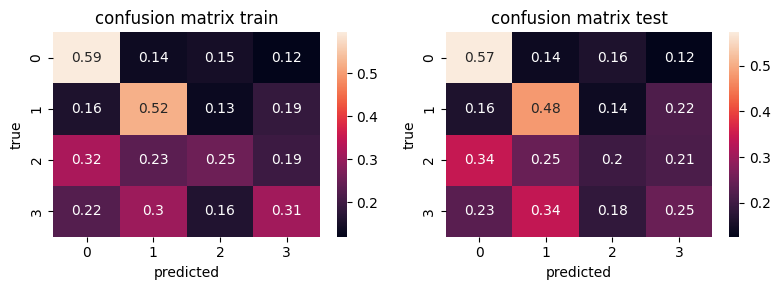

In [58]:
# Visualizar las matrices normalizadas usando mapas de calor
import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

Aplicar modelo al test.csv

In [59]:
test = pd.read_csv("test.csv")
test.head()


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


limpieza de datos nulos

In [60]:
sum(test.E_PAGOMATRICULAPROPIO.isna()),
sum(test.F_TIENECOMPUTADOR.isna()),
sum(test.F_TIENEINTERNET.isna()),
sum(test.F_EDUCACIONPADRE.isna()),
sum(test.F_EDUCACIONMADRE.isna()),
sum(test.E_HORASSEMANATRABAJA.isna()),
sum(test.F_ESTRATOVIVIENDA.isna())


13795

In [61]:
test.E_PAGOMATRICULAPROPIO.values[test.E_PAGOMATRICULAPROPIO.isna()] = 'no info'
test.F_TIENECOMPUTADOR.values[test.F_TIENECOMPUTADOR.isna()] = 'no info'
test.F_TIENEINTERNET.values[test.F_TIENEINTERNET.isna()] = 'no info'
test.F_EDUCACIONPADRE.values[test.F_EDUCACIONPADRE.isna()] = 'no info'
test.F_EDUCACIONMADRE.values[test.F_EDUCACIONMADRE.isna()] = 'no info'
test.E_HORASSEMANATRABAJA.values[test.E_HORASSEMANATRABAJA.isna()] = '0'
test.F_ESTRATOVIVIENDA.values[test.F_ESTRATOVIVIENDA.isna()] = '0'


In [62]:
# Asegurar categorías válidas
test.E_PAGOMATRICULAPROPIO = [
    i if i in E_PAGOMATRICULAPROPIO_onehot_vals else 'no info'
    for i in test.E_PAGOMATRICULAPROPIO.astype(str)
]

# One-hot encoding test
E_PAGOMATRICULAPROPIO_test_enc = np.r_[
    [E_PAGOMATRICULAPROPIO_onehot_vals[i] for i in test.E_PAGOMATRICULAPROPIO.astype(str)]
]

# DF
E_PAGOMATRICULAPROPIO_test_df = pd.DataFrame(
    E_PAGOMATRICULAPROPIO_test_enc,
    columns=[f"E_PAGOMATRICULAPROPIO__{v}" for v in E_PAGOMATRICULAPROPIO_onehot_vals]
)


In [63]:
test.F_TIENECOMPUTADOR = [
    i if i in F_TIENECOMPUTADOR_onehot_vals else 'no info'
    for i in test.F_TIENECOMPUTADOR.astype(str)
]

F_TIENECOMPUTADOR_test_enc = np.r_[
    [F_TIENECOMPUTADOR_onehot_vals[i] for i in test.F_TIENECOMPUTADOR.astype(str)]
]

F_TIENECOMPUTADOR_test_df = pd.DataFrame(
    F_TIENECOMPUTADOR_test_enc,
    columns=[f"F_TIENECOMPUTADOR__{v}" for v in F_TIENECOMPUTADOR_onehot_vals]
)


In [64]:
# Renombrar columna del test para que coincida con el train
if 'F_TIENEINTERNET_1' in test.columns:
    test = test.rename(columns={'F_TIENEINTERNET_1': 'F_TIENEINTERNET.1'})


In [65]:
test['F_TIENEINTERNET.1'] = [
    i if i in F_TIENEINTERNET_onehot_vals else 'no info'
    for i in test['F_TIENEINTERNET.1'].astype(str)
]

F_TIENEINTERNET_test_enc = np.r_[
    [F_TIENEINTERNET_onehot_vals[i] for i in test['F_TIENEINTERNET.1'].astype(str)]
]

F_TIENEINTERNET_test_df = pd.DataFrame(
    F_TIENEINTERNET_test_enc,
    columns=[f"F_TIENEINTERNET__{v}" for v in F_TIENEINTERNET_onehot_vals]
)


In [66]:
test.F_EDUCACIONPADRE = [
    i if i in F_EDUCACIONPADRE_onehot_vals else 'no info'
    for i in test.F_EDUCACIONPADRE.astype(str)
]

F_EDUCACIONPADRE_test_enc = np.r_[
    [F_EDUCACIONPADRE_onehot_vals[i] for i in test.F_EDUCACIONPADRE.astype(str)]
]

F_EDUCACIONPADRE_test_df = pd.DataFrame(
    F_EDUCACIONPADRE_test_enc,
    columns=[f"F_EDUCACIONPADRE__{v}" for v in F_EDUCACIONPADRE_onehot_vals]
)


In [67]:
test.F_EDUCACIONMADRE = [
    i if i in F_EDUCACIONMADRE_onehot_vals else 'no info'
    for i in test.F_EDUCACIONMADRE.astype(str)
]

F_EDUCACIONMADRE_test_enc = np.r_[
    [F_EDUCACIONMADRE_onehot_vals[i] for i in test.F_EDUCACIONMADRE.astype(str)]
]

F_EDUCACIONMADRE_test_df = pd.DataFrame(
    F_EDUCACIONMADRE_test_enc,
    columns=[f"F_EDUCACIONMADRE__{v}" for v in F_EDUCACIONMADRE_onehot_vals]
)


In [68]:
test.F_ESTRATOVIVIENDA = [
    i if i in F_ESTRATOVIVIENDA_onehot_vals else 'no info'
    for i in test.F_ESTRATOVIVIENDA.astype(str)
]

F_ESTRATOVIVIENDA_test_enc = np.r_[
    [F_ESTRATOVIVIENDA_onehot_vals[i] for i in test.F_ESTRATOVIVIENDA.astype(str)]
]

F_ESTRATOVIVIENDA_test_df = pd.DataFrame(
    F_ESTRATOVIVIENDA_test_enc,
    columns=[f"F_ESTRATOVIVIENDA__{v}" for v in F_ESTRATOVIVIENDA_onehot_vals]
)


Concatenar datos

In [69]:
test_final = pd.concat([
    E_PAGOMATRICULAPROPIO_test_df,
    F_TIENECOMPUTADOR_test_df,
    F_TIENEINTERNET_test_df,
    F_EDUCACIONPADRE_test_df,
    F_EDUCACIONMADRE_test_df,
    F_ESTRATOVIVIENDA_test_df,
    test
], axis=1)


In [70]:
columnas_a_eliminar = [
    'E_PAGOMATRICULAPROPIO',
    'F_TIENECOMPUTADOR',
    'F_TIENEINTERNET',
    'F_TIENEINTERNET.1',
    'F_EDUCACIONPADRE',
    'F_EDUCACIONMADRE',
    'F_ESTRATOVIVIENDA',
    'E_HORASSEMANATRABAJA'
]

test_final = test_final.drop(columnas_a_eliminar, axis=1, errors='ignore')
test_final.shape


(296786, 51)

In [71]:
# 1. Obtener la lista de columnas usadas en el entrenamiento
columnas_modelo = datos.drop(y, axis=1).columns

# 2. Agregar columnas faltantes en test_final
for col in columnas_modelo:
    if col not in test_final.columns:
        test_final[col] = 0

# 3. Eliminar columnas sobrantes que NO están en el modelo
cols_sobrantes = [c for c in test_final.columns if c not in columnas_modelo]
test_final = test_final.drop(columns=cols_sobrantes)

# 4. Ordenar columnas EXACTAMENTE como en entrenamiento
test_final = test_final[columnas_modelo]

# 5. Matriz final lista para predecir
X_test_data = test_final.values

X_test_data.shape


(296786, 75)

In [72]:
y_pred_test = rf.predict(X_test_data)


In [73]:
import numpy as np
np.unique(y_pred_test, return_counts=True)


(array(['alto', 'bajo', 'medio-alto', 'medio-bajo'], dtype=object),
 array([ 66804, 204980,   7359,  17643]))

In [74]:
submission = pd.DataFrame({
    'ID': test['ID'],
    'RENDIMIENTO_GLOBAL': y_pred_test
})



In [75]:
submission.to_csv("submission.csv", index=False) # Se exporta el archivo en formato csv

In [76]:
!head submission.csv

ID,RENDIMIENTO_GLOBAL
550236,bajo
98545,medio-alto
499179,bajo
782980,bajo
785185,medio-bajo
58495,bajo
705444,bajo
557548,alto
519909,medio-bajo


In [77]:
submission.shape

(296786, 2)

In [78]:
#Se carga la solucion a kaggle
!kaggle competitions submit -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia -f submission.csv -m "Gabriela Tejada submission with random forest model"

100% 3.51M/3.51M [00:00<00:00, 14.8MB/s]
Successfully submitted to UDEA/ai4eng 20252 - Pruebas Saber Pro Colombia